## Observations and Insights 

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files_
mouse_metadata_path = "data_files/Mouse_metadata.csv"
study_results_path = "data_files/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset (merge with an inner join on mouse ID)
main_study_df =  pd.merge(mouse_metadata,study_results,on="Gender")

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from scipy.stats import gaussian_kde
import scipy.stats as sts
# Study data files_
zillowdayspath = "DaysonZillow1.csv"
zillowpricepath = "Median_Sale_Prices_2019.csv"

# Read the mouse data and the study results
zillow_days_df = pd.read_csv(zillowdayspath)
zillow_price_df = pd.read_csv(zillowpricepath)

print('zillow price ', zillow_days_df)

zillow price       RegionID                          RegionName State    Jan    Feb    Mar  \
0      102001                       United States    US   95.0   98.0   84.0   
1      394913                        New York, NY    NY  140.0  147.0  148.0   
2      753899  Los Angeles-Long Beach-Anaheim, CA    CA   86.0   89.0   70.0   
3      394463                         Chicago, IL    IL  114.0  122.0  117.0   
4      394514               Dallas-Fort Worth, TX    TX   77.0   77.0   63.0   
..        ...                                 ...   ...    ...    ...    ...   
655    394578                        Evanston, WY    WY    NaN    NaN  158.0   
656    395004                      Prineville, OR    OR  115.0  141.0  143.0   
657    786263                         Ruidoso, NM    NM    NaN    NaN   87.5   
658    394805                      Los Alamos, NM    NM   54.0   68.0   45.0   
659    395111                         Spencer, IA    IA    NaN    NaN    NaN   

       Apr    May    Jun 

In [2]:
#Merge Zillow Days with Zillow Price (merge on region ID)
merged_df = pd.merge(zillow_days_df, zillow_price_df, on=['RegionID'], how='inner')
merged_df


print(merged_df.head(10))



   RegionID             RegionName_x State  Jan_x  Feb_x  Mar_x  Apr_x  May_x  \
0    102001            United States    US   95.0   98.0   84.0   72.0   67.0   
1    394865  Minneapolis-St Paul, MN    MN   86.0   85.0   66.0   58.0   56.0   
2    394543               Duluth, MN    MN  115.0  134.0  135.0   74.0   70.0   
3    395030            Rochester, MN    MN   96.0  106.5   75.0   57.0   67.0   
4    395118            St. Cloud, MN    MN  106.0   84.0   78.0   72.5   65.0   
5    394823              Mankato, MN    MN  108.0  153.0  137.0   94.0   80.0   
6    394410             Brainerd, MN    MN    NaN    NaN    NaN   89.0   75.0   
7    394591         Fergus Falls, MN    MN    NaN    NaN    NaN    NaN    NaN   
8    395234               Winona, MN    MN  128.5  110.0  141.0   96.0  103.0   
9    395017             Red Wing, MN    MN  106.0  140.0  119.0   80.0   72.0   

   Jun_x  Jul_x  ...   Mar_y   Apr_y   May_y   Jun_y   Jul_y   Aug_y   Sep_y  \
0   67.0   69.0  ...  230900

In [3]:
#Get Price Info
US_price =  merged_df.loc[(merged_df['State'] == 'US'),['Jan_y', 'Feb_y', 'Mar_y', 'Apr_y','May_y','Jun_y','Jul_y','Aug_y','Sep_y','Oct_y','Nov_y','Dec_y']]

MN_price =  merged_df.loc[(merged_df['State'] == 'MN'),['Jan_y', 'Feb_y', 'Mar_y', 'Apr_y','May_y','Jun_y','Jul_y','Aug_y','Sep_y','Oct_y','Nov_y','Dec_y']]

US_price_x = US_price.mean()
US_price_m = US_price.median()
MN_price_m = MN_price.median()
print(US_price_x)

Jan_y    226000.0
Feb_y    228300.0
Mar_y    230900.0
Apr_y    231500.0
May_y    231300.0
Jun_y    231900.0
Jul_y    232400.0
Aug_y    233100.0
Sep_y    233800.0
Oct_y    235900.0
Nov_y    239200.0
Dec_y    242100.0
dtype: float64


In [4]:
#Get Days on Zillow Info
MN_days_df = merged_df.loc[(merged_df['State'] == 'MN'),['Jan_x', 'Feb_x', 'Mar_x', 'Apr_x','May_x', 'Jun_x','Jul_x','Aug_x','Sep_x','Oct_x','Nov_x','Dec_x']]
US_days_df = merged_df.loc[(merged_df['State'] == 'US'),['Jan_x', 'Feb_x', 'Mar_x', 'Apr_x','May_x', 'Jun_x','Jul_x','Aug_x','Sep_x','Oct_x','Nov_x','Dec_x']]

MN_days_avg = MN_days_df.mean()
MN_days_med = MN_days_df.median()
US_days_avg = US_days_df.mean()
US_days_med = US_days_df.median()
print(MN_days_avg)
meanmeanMN = MN_days_avg.mean()
meanmeanUS = US_days_avg.mean()
print(meanmeanMN, meanmeanUS)
#months = total_counts.keys()

Jan_x    104.050000
Feb_x    111.850000
Mar_x    104.050000
Apr_x     78.318182
May_x     72.583333
Jun_x     63.346154
Jul_x     65.035714
Aug_x     67.071429
Sep_x     69.392857
Oct_x     73.464286
Nov_x     76.107143
Dec_x     88.071429
dtype: float64
81.11171051171051 77.91666666666667


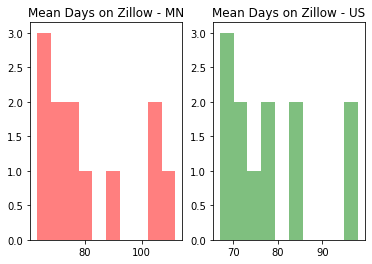

In [5]:
# bar plot of days on Zillow - how does the distribution of days compare for 2019



# Create the figure and two axes (two rows, one column)
fig, ax = plt.subplots(1,2)

ax[0].hist(MN_days_avg, alpha = 0.5, color = 'r')
ax[0].set_title("Mean Days on Zillow - MN")
ax[1].hist(US_days_avg, alpha = 0.5, color = 'g')
ax[1].set_title("Mean Days on Zillow - US")
plt.show()




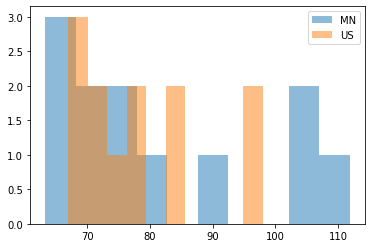

In [6]:
from matplotlib import pyplot
pyplot.hist(MN_days_avg, alpha=0.5, label='MN')
pyplot.hist(US_days_avg, alpha=0.5, label='US')
pyplot.legend(loc='upper right')
pyplot.show()



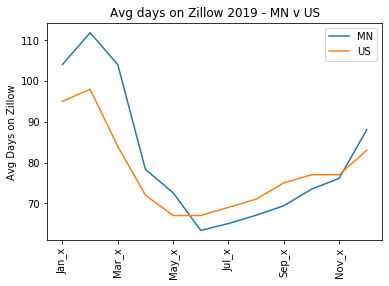

In [7]:
ax = MN_days_avg.plot.line(label='MN')
ax1 = US_days_avg.plot.line(label='US')
plt.ylabel("Avg Days on Zillow")
plt.ylabel("Avg Days on Zillow")
plt.title("Avg days on Zillow 2019 - MN v US")
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

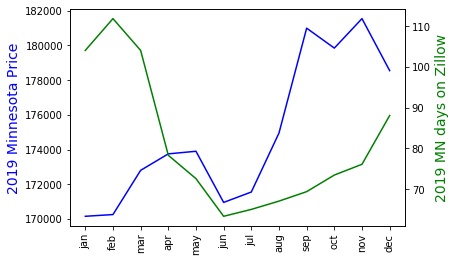

In [8]:
fig,ax = plt.subplots()
xlabs = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
# make a plot
ax.plot(xlabs,MN_price_m, color="blue")

# set y-axis label
ax.set_ylabel("2019 Minnesota Price",color="blue",fontsize=14)

# twin object for two different y-axis on the sample plot
ax1=ax.twinx()

# make a plot with different y-axis using second axis object
ax1.plot(xlabs,MN_days_avg ,color="green")
ax1.set_ylabel("2019 MN days on Zillow",color="green",fontsize=14)

ax.set_xticklabels(xlabs, rotation=90)
plt.show()

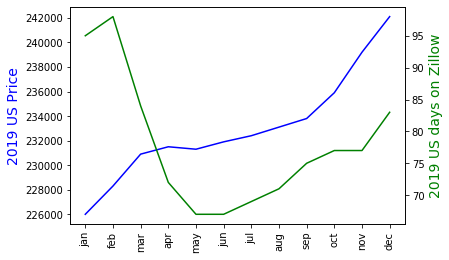

In [9]:
fig,ax = plt.subplots()
xlabs = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
# make a plot
ax.plot(xlabs,US_price_m, color="blue")

# set y-axis label
ax.set_ylabel("2019 US Price",color="blue",fontsize=14)

# twin object for two different y-axis on the sample plot
ax1=ax.twinx()

# make a plot with different y-axis using second axis object
ax1.plot(xlabs,US_days_avg ,color="green")
ax1.set_ylabel("2019 US days on Zillow",color="green",fontsize=14)

ax.set_xticklabels(xlabs, rotation=90)
plt.show()

r^2=0.86
y={:.2f}x+{:.2f}r^2=0.86


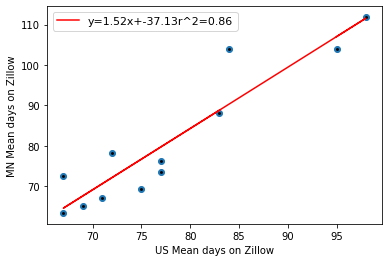

In [10]:
from matplotlib.figure import Figure
x=US_days_avg
y=MN_days_avg
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
r = str(round(rvalue**2,2))
r="r^2=" + r
print(r)
lbl = 'y={:.2f}x+{:.2f}'
lbl = lbl + r
print (lbl)
yp = x * slope + intercept
line_eq = "y=" +str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x, yp, 'r', label=lbl.format(slope,intercept))
#end
plt.scatter(x,y, color="k", s=3.5)
plt.legend(fontsize=11)

#Axes labels
plt.xlabel('US Mean days on Zillow')
plt.ylabel('MN Mean days on Zillow')

plt.show()
#'y={:.2f}x+{:.2f}'